In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aviakompaniya/sample_submission.csv
/kaggle/input/aviakompaniya/train_dataset.csv
/kaggle/input/aviakompaniya/test_dataset.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics 

In [3]:
train = pd.read_csv('../input/aviakompaniya/train_dataset.csv')
test = pd.read_csv('../input/aviakompaniya/test_dataset.csv')


In [4]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [5]:
test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,...,5,2,4,4,3,5,1,5,152,191.0
1,2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
2,3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
3,4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,...,1,5,4,4,1,3,3,5,0,0.0
4,5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,...,5,5,4,5,4,5,5,5,130,140.0


In [6]:
train.shape

(10000, 24)

In [7]:
test.shape

(4000, 23)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 4000 non-null   int64  
 1   Gender                             4000 non-null   object 
 2   Customer Type                      4000 non-null   object 
 3   Age                                4000 non-null   int64  
 4   Type of Travel                     4000 non-null   object 
 5   Class                              4000 non-null   object 
 6   Flight Distance                    4000 non-null   int64  
 7   Inflight wifi service              4000 non-null   int64  
 8   Departure/Arrival time convenient  4000 non-null   int64  
 9   Ease of Online booking             4000 non-null   int64  
 10  Gate location                      4000 non-null   int64  
 11  Food and drink                     4000 non-null   int64

In [10]:
train.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [11]:
test.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             19
dtype: int64

In [12]:
train.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9972.000000,10000.000000
mean,5000.50000,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,2886.89568,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.046355,0.500025
min,1.00000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,5000.50000,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,7500.25000,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,10000.00000,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


In [13]:
test.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,3981.000000
mean,2000.500000,39.886750,1217.960000,2.768250,3.021250,2.788500,2.979500,3.279750,3.358000,3.514250,3.412000,3.405750,3.379750,3.631250,3.334500,3.679500,3.349750,13.86525,14.157749
std,1154.844867,14.748519,1012.709063,1.380948,1.554478,1.448721,1.286466,1.331703,1.350664,1.319179,1.322382,1.275352,1.346103,1.187487,1.257778,1.184749,1.319796,35.48267,35.831589
min,1.000000,7.000000,67.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000
25%,1000.750000,27.000000,416.750000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,2000.500000,40.000000,868.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.00000,0.000000
75%,3000.250000,51.000000,1750.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.00000,12.000000
max,4000.000000,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,624.00000,615.000000


In [14]:
satis_rate = train['satisfaction'].value_counts()/len(train)*100
satis_rate

satisfaction
0    50.0
1    50.0
Name: count, dtype: float64

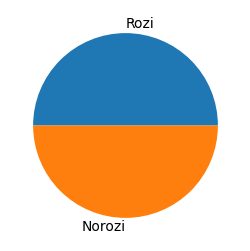

In [15]:
plt.figure(figsize=(3,3))
plt.pie(satis_rate, labels=['Rozi','Norozi'])
plt.show()

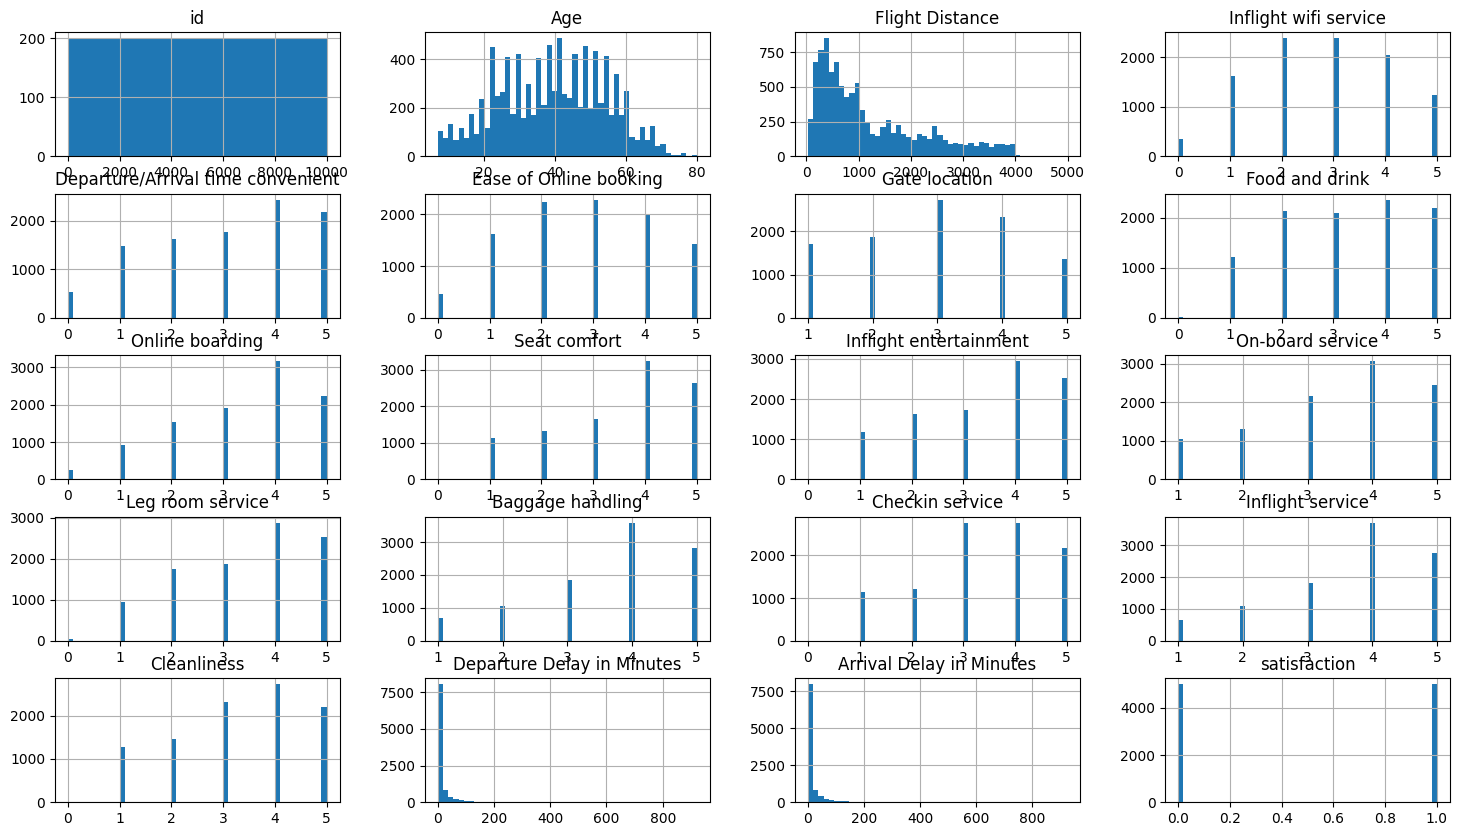

In [16]:
%matplotlib inline
train.hist(bins=50, figsize=(18, 10))
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

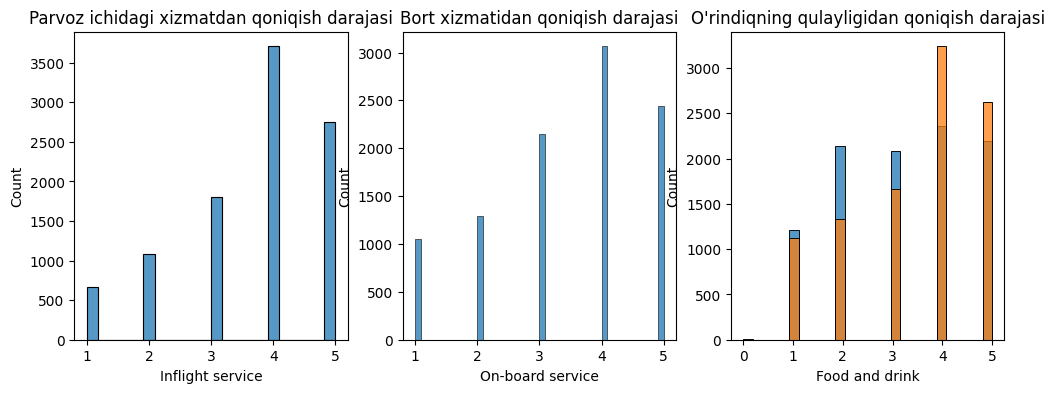

In [17]:
fig, axes = plt.subplots(1,3, figsize=(12,4))

sns.histplot(x="Inflight service", data=train, ax=axes[0])
axes[0].set_title("Parvoz ichidagi xizmatdan qoniqish darajasi")

sns.histplot(x="On-board service", data=train, ax=axes[1])
axes[1].set_title("Bort xizmatidan qoniqish darajasi")

sns.histplot(x="Food and drink", data=train, ax=axes[2])
axes[2].set_title("Oziq-ovqat va ichimlikdan qoniqish darajasi")

sns.histplot(x="Seat comfort", data=train, ax=axes[2])
axes[2].set_title("O'rindiqning qulayligidan qoniqish darajasi")


plt.show()

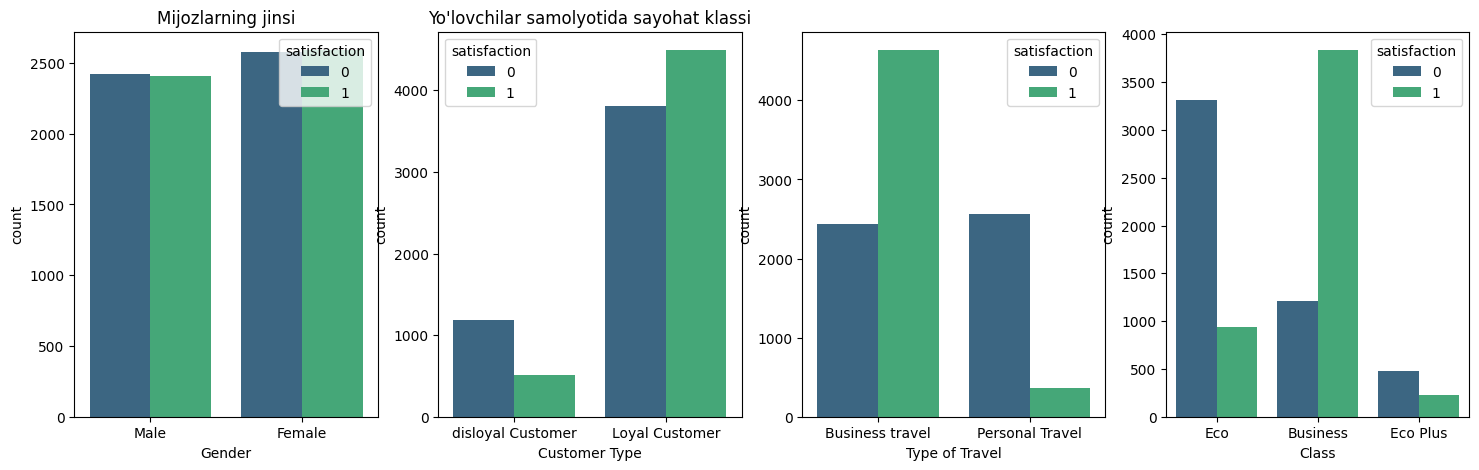

In [18]:
fig, axes = plt.subplots(1,4, figsize=(18,5))

sns.countplot(x='Gender', hue='satisfaction', palette='viridis', data=train, ax=axes[0])
axes[0].set_title("Mijozlarning jinsi")

sns.countplot(x='Customer Type', hue='satisfaction', palette='viridis', data=train, ax=axes[1])
axes[1].set_title("Sodiq yoki ishonchsiz mijoz turi")

sns.countplot(x='Type of Travel', hue='satisfaction', palette='viridis', data=train, ax=axes[2])
axes[1].set_title("Yo'lovchilar parvozining maqsadi")

sns.countplot(x='Class', hue='satisfaction', palette='viridis', data=train, ax=axes[3])
axes[1].set_title("Yo'lovchilar samolyotida sayohat klassi")




plt.show()

In [19]:
train_num = train.drop(['Gender', 'Customer Type', 'Type of Travel','Class'], axis=1)

In [20]:
train_num.corrwith(train['satisfaction']).abs().sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.504986
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048650
Departure Delay in Minutes           0.042960
Gate location                        0.007169
id                                   0.002931
dtype: float64

In [21]:
print(f"Mavjud bo'lmagan qiymatlar soni: {train.isnull().sum().sum()}")
missing_rows = train[train.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rows/len(train)*100)}%")

Mavjud bo'lmagan qiymatlar soni: 28
Mavjud bo'lmagan qatorlar soni: 28
Mavjud bo'lmagan qatorlar %: 0.0%


In [22]:
data = train.drop(['Departure/Arrival time convenient', 'Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Gate location', 'id'], axis=1)
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Male,disloyal Customer,33,Business travel,Eco,571,2,2,4,2,4,4,3,1,3,4,3,4,0
1,Female,Loyal Customer,49,Business travel,Business,1431,4,4,3,5,4,5,5,5,5,3,5,3,1
2,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,3,1,1,1,1,1,1,2,0
3,Female,Loyal Customer,27,Business travel,Business,1550,3,3,2,2,2,2,4,4,5,5,4,2,1
4,Male,Loyal Customer,11,Personal Travel,Eco,526,3,3,4,3,4,4,5,2,5,3,5,4,0


In [23]:
data.isnull().sum()

Gender                    0
Customer Type             0
Age                       0
Type of Travel            0
Class                     0
Flight Distance           0
Inflight wifi service     0
Ease of Online booking    0
Food and drink            0
Online boarding           0
Seat comfort              0
Inflight entertainment    0
On-board service          0
Leg room service          0
Baggage handling          0
Checkin service           0
Inflight service          0
Cleanliness               0
satisfaction              0
dtype: int64

In [24]:
data['satisfaction'].value_counts()/len(data)

satisfaction
0    0.5
1    0.5
Name: count, dtype: float64

In [25]:
encoded = pd.get_dummies(data)
encoded.head()

,Age,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,33,571,2,2,4,2,4,4,3,1,...,0,False,True,False,True,True,False,False,True,False
1,49,1431,4,4,3,5,4,5,5,5,...,1,True,False,True,False,True,False,True,False,False
2,43,867,1,4,4,4,3,1,1,1,...,0,True,False,True,False,True,False,False,True,False
3,27,1550,3,3,2,2,2,2,4,4,...,1,True,False,True,False,True,False,True,False,False
4,11,526,3,3,4,3,4,4,5,2,...,0,False,True,True,False,False,True,False,True,False


In [26]:
X = encoded.drop("satisfaction", axis=1)
y = encoded['satisfaction']

In [27]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)


In [29]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)


y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1000
           1       0.87      0.85      0.86      1000

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000

Model aniqligi: 0.863


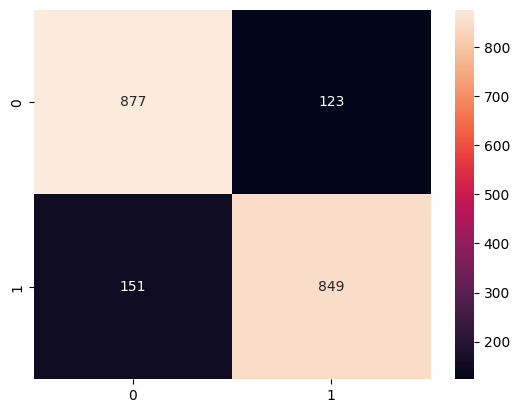

In [30]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

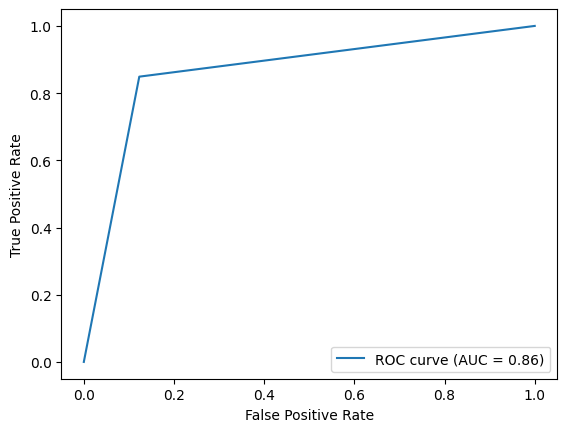

In [31]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [32]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1000
           1       0.93      0.92      0.93      1000

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Model aniqligi: 0.929


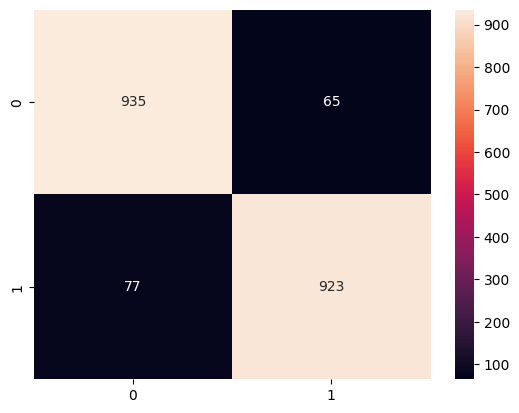

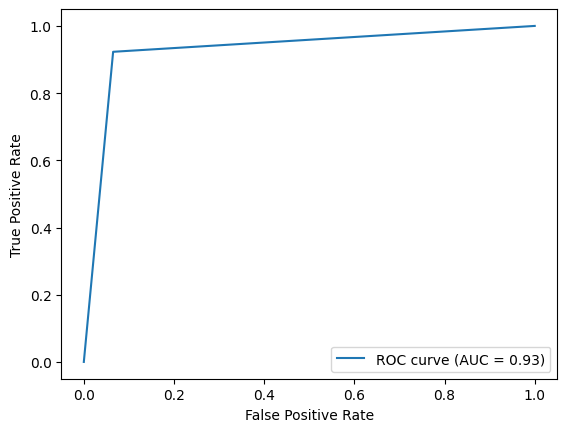

In [33]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1000
           1       0.93      0.93      0.93      1000

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Model aniqligi: 0.927


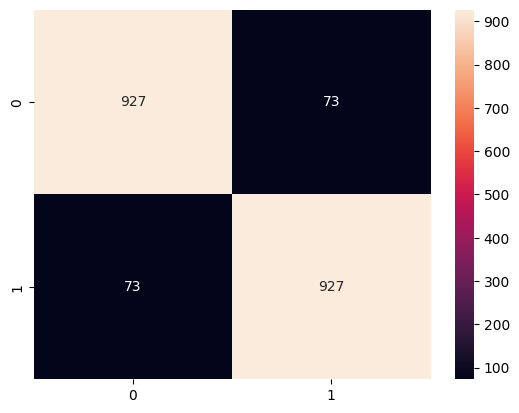

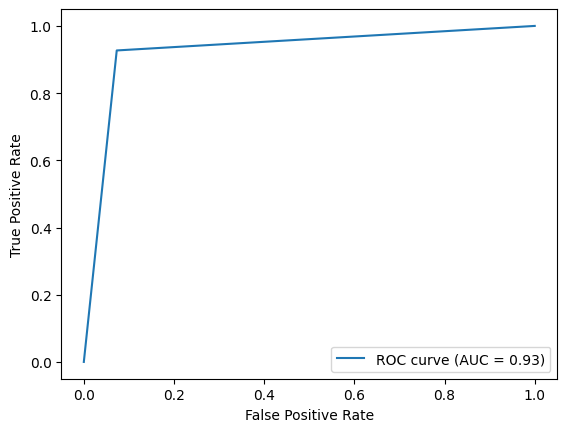

In [34]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)


y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))


conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()


fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1000
           1       0.94      0.94      0.94      1000

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model aniqligi: 0.942


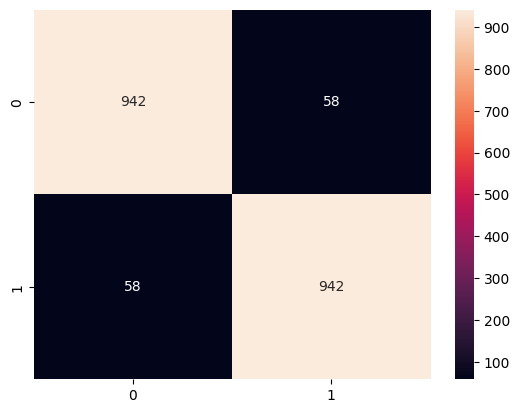

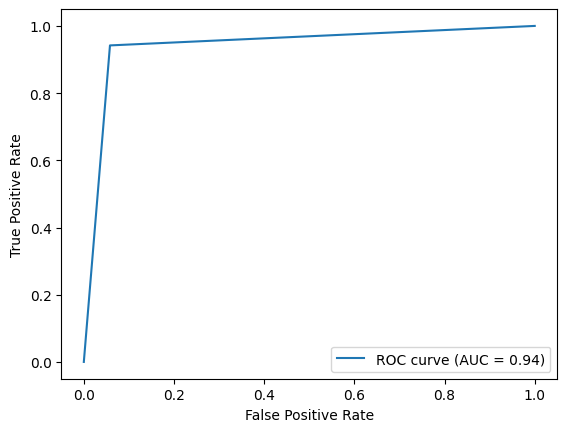

In [35]:
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1000
           1       0.95      0.94      0.94      1000

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model aniqligi: 0.9445


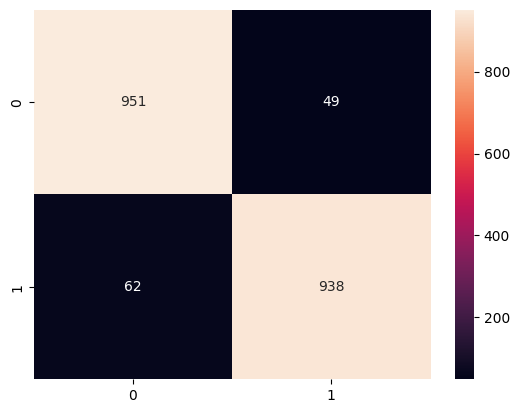

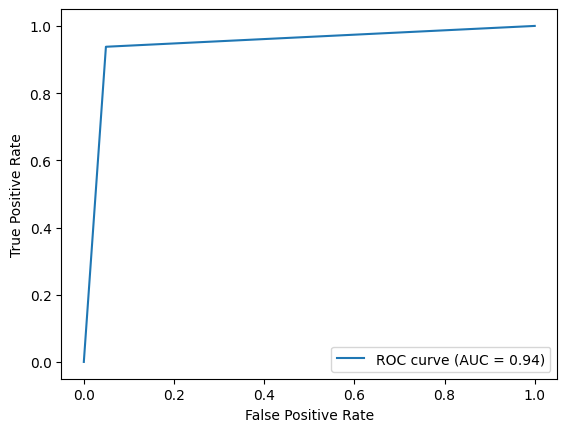

In [36]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [37]:
test_1 = test.drop(['Departure/Arrival time convenient', 'Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Gate location'], axis=1)
test_df = pd.get_dummies(test_1)


In [38]:
clf = SVC()
clf.fit(X, y)

test_data = test_df.drop("id", axis=1).copy()
prediction = clf.predict(test_data)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [39]:
submission = pd.DataFrame({
        "id": test["id"],
        "satisfaction": prediction
    })

submission.to_csv('submission.csv', index=False)

In [40]:
submission = pd.read_csv('submission.csv')
submission.head()

,id,satisfaction
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
